In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.multiclass import OneVsRestClassifier
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

import warnings

warnings.filterwarnings('ignore')

Using TensorFlow backend.
/Users/tailtq/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### Steps:
1. Check missing values
2. Data exploitation
3. Check outliers
4. Feature scaling
    + Elevation
    + Aspect
    + Slope
    + Horizontal_Distance_To_Hydrology
    + Vertical_Distance_To_Hydrology
    + Horizontal_Distance_To_Roadways
    + Hillshade_9am
    + Hillshade_Noon
    + Hillshade_3pm
    + Horizontal_Distance_To_Fire_Points
5. Use multiple models (model selection)
    + Perceptron
    + Random forest
    + Decision tree
    + OvR regression

#### 1. Check missing values

In [3]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


#### 2. Data exploitation

In [4]:
areas = df.copy()

In [5]:
areas.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


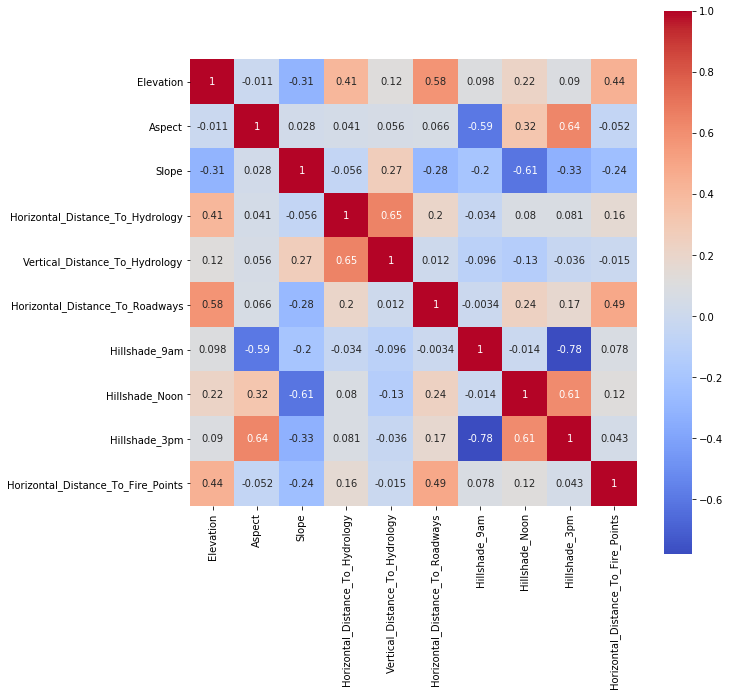

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(areas[[
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points',
]].corr(), annot=True, square=True, ax=ax, cmap='coolwarm')

In [7]:
def r(x):
    if x + 180 > 360:
        return x - 180
    else:
        return x + 180

In [8]:
areas['Aspect'] = areas.Aspect.map(r)
areas['Highwater'] = areas.Vertical_Distance_To_Hydrology < 0

areas['EVDtH'] = areas.Elevation - areas.Vertical_Distance_To_Hydrology
areas['EHDtH'] = areas.Elevation - areas.Horizontal_Distance_To_Hydrology * 0.3

areas['Hillshade_3pm'].loc[lambda x: x == 0] = areas['Hillshade_3pm'].mean()

In [9]:
areas['Hydro_Fire_1'] = areas['Horizontal_Distance_To_Hydrology'] + areas['Horizontal_Distance_To_Fire_Points']
areas['Hydro_Fire_2'] = abs(areas['Horizontal_Distance_To_Hydrology'] - areas['Horizontal_Distance_To_Fire_Points'])

areas['Hydro_Road_1'] = abs(areas['Horizontal_Distance_To_Hydrology'] + areas['Horizontal_Distance_To_Roadways'])
areas['Hydro_Road_2'] = abs(areas['Horizontal_Distance_To_Hydrology'] - areas['Horizontal_Distance_To_Roadways'])

areas['Fire_Road_1'] = abs(areas['Horizontal_Distance_To_Fire_Points'] + areas['Horizontal_Distance_To_Roadways'])
areas['Fire_Road_2'] = abs(areas['Horizontal_Distance_To_Fire_Points'] - areas['Horizontal_Distance_To_Roadways'])

In [10]:
areas['Distance_To_Hydrology'] = (areas['Horizontal_Distance_To_Hydrology'] ** 2 + areas['Vertical_Distance_To_Hydrology'] ** 2) ** 0.5

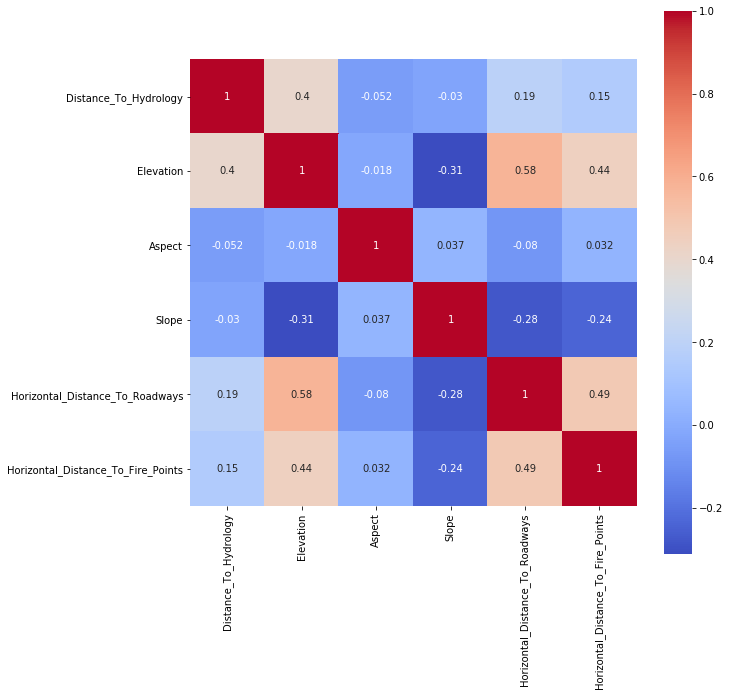

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(areas[[
    'Distance_To_Hydrology',
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Roadways',
    'Horizontal_Distance_To_Fire_Points',
]].corr(), annot=True, square=True, ax=ax, cmap='coolwarm')

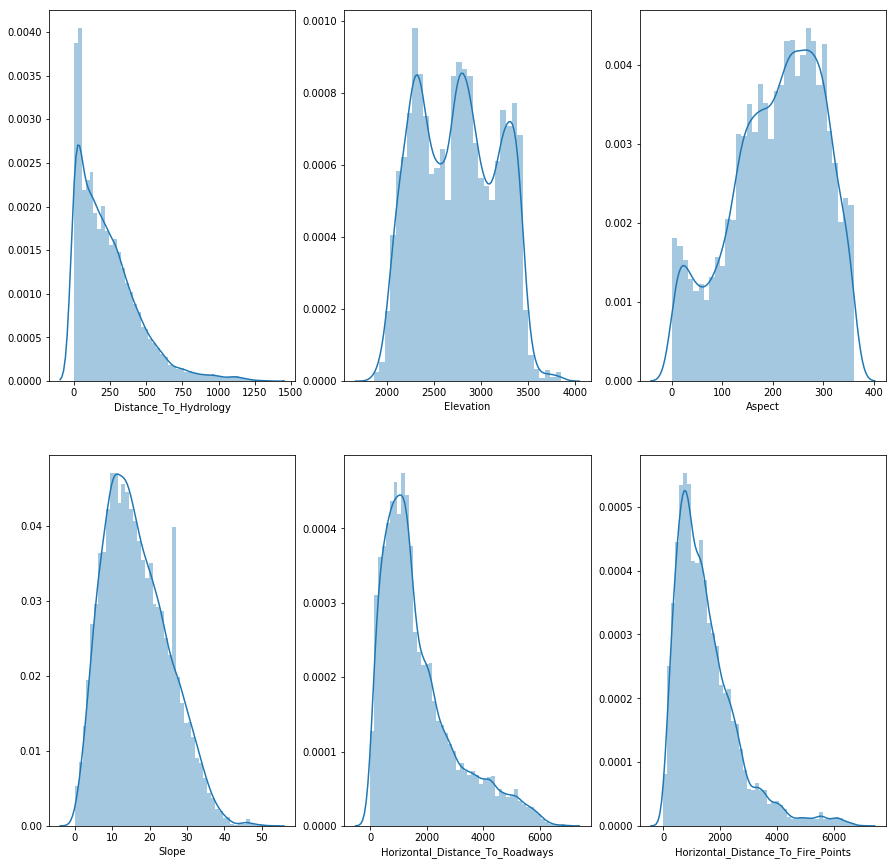

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(15, 15))

sns.distplot(areas['Distance_To_Hydrology'], ax=ax[0][0])
sns.distplot(areas['Elevation'], ax=ax[0][1])
sns.distplot(areas['Aspect'], ax=ax[0][2])
sns.distplot(areas['Slope'], ax=ax[1][0])
sns.distplot(areas['Horizontal_Distance_To_Roadways'], ax=ax[1][1])
sns.distplot(areas['Horizontal_Distance_To_Fire_Points'], ax=ax[1][2])

plt.show()

In [13]:
# q = areas['Horizontal_Distance_To_Fire_Points'].quantile(0.99)
# areas = areas[areas['Horizontal_Distance_To_Fire_Points'] < q]

# q = areas['Horizontal_Distance_To_Roadways'].quantile(0.99)
# areas = areas[areas['Horizontal_Distance_To_Roadways'] < q]

# q = areas['Distance_To_Hydrology'].quantile(0.99)
# areas = areas[areas['Distance_To_Hydrology'] < q]

#### Feature scaling

In [14]:
features_scaling = [
#     'EVDtH',
#     'EHDtH',
    'Elevation',
    'Aspect',
    'Slope',
    'Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Horizontal_Distance_To_Fire_Points',
#     'Hillshade_9am',
#     'Hillshade_Noon',
#     'Hillshade_3pm'
]

for feature in features_scaling:
    areas[feature] = areas[feature] / areas[feature].max()

In [15]:
dropped_columns = [
    'Id',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Soil_Type7',
    'Soil_Type15',
    'Cover_Type'
]
X = areas.drop(dropped_columns, axis=1)
y = areas['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

X.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,...,Soil_Type40,EVDtH,EHDtH,Hydro_Fire_1,Hydro_Fire_2,Hydro_Road_1,Hydro_Road_2,Fire_Road_1,Fire_Road_2,Distance_To_Hydrology
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.714295,0.574763,0.317338,0.248770,212.704299,218.965608,135.878247,0.216094,0.237897,0.033003,...,0.030357,2698.246032,2681.163843,1738.342989,1291.834788,1941.218915,1492.094577,3225.170503,897.908333,0.173883
std,0.108516,0.250031,0.162576,0.192317,30.561287,22.801966,44.716071,0.157291,0.425810,0.178649,...,0.171574,414.680029,395.852462,1152.123001,1077.167415,1383.173588,1292.673425,2093.672478,884.718318,0.158807
min,0.484022,0.002778,0.000000,0.000000,0.000000,99.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1842.000000,1827.000000,30.000000,0.000000,30.000000,0.000000,95.000000,0.000000,0.000000
25%,0.617303,0.405556,0.192308,0.110885,196.000000,207.000000,107.000000,0.104390,0.000000,0.000000,...,0.000000,2323.000000,2321.675000,903.000000,532.000000,967.000000,534.000000,1806.000000,291.000000,0.049513
50%,0.714991,0.608333,0.288462,0.191001,220.000000,223.000000,138.000000,0.179608,0.000000,0.000000,...,0.000000,2696.000000,2690.400000,1462.000000,1023.500000,1501.000000,1148.000000,2520.500000,632.000000,0.138901
75%,0.806443,0.775000,0.423077,0.329463,235.000000,235.000000,167.000000,0.284320,0.000000,0.000000,...,0.000000,3068.000000,3017.025000,2302.000000,1726.000000,2554.000000,2042.000000,4232.250000,1220.000000,0.252089
max,1.000000,1.000000,1.000000,1.000000,254.000000,254.000000,248.000000,1.000000,1.000000,1.000000,...,1.000000,3776.000000,3583.400000,7167.000000,6898.000000,7306.000000,6860.000000,12504.000000,6012.000000,1.000000


#### Models selection

In [16]:
model1 = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='entropy')
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8891534391534391

In [17]:
model2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8087301587301587

In [18]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.6150793650793651

In [19]:
def plot_learning_curve(estimator, X, y):
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, 
                                                            y,
                                                            # Number of folds in cross-validation
                                                            # Evaluation metric
                                                            scoring='accuracy',
                                                            cv=10,
                                                            # Use all computer cores
                                                            n_jobs=-1, 
                                                            # 50 different sizes of the training set
                                                            train_sizes=np.linspace(0.01, 1.0, 50))
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color='#111111',  label='Training score')
    plt.plot(train_sizes, test_mean, color='#111111', label='Cross-validation score')

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

    # Create plot
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size'), plt.ylabel('Accuracy Score'), plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [20]:
# plot_learning_curve(OneVsRestClassifier(LogisticRegression()), X_train, y_train)

In [21]:
# plot_learning_curve(DecisionTreeClassifier(criterion='entropy', random_state=0), X_train, y_train)

In [22]:
# plot_learning_curve(RandomForestClassifier(criterion='entropy', random_state=0), X_train, y_train)

In [23]:
# plot_learning_curve(GaussianNB(), X_train, y_train)

## Test set

In [24]:
areas_test = df_test.copy()

In [25]:
areas_test['Aspect'] = areas_test.Aspect.map(r)
areas_test['Highwater'] = areas_test.Vertical_Distance_To_Hydrology < 0

areas_test['EVDtH'] = areas_test.Elevation - areas_test.Vertical_Distance_To_Hydrology
areas_test['EHDtH'] = areas_test.Elevation - areas_test.Horizontal_Distance_To_Hydrology * 0.3

areas_test['Hillshade_3pm'].loc[lambda x: x == 0] = areas_test['Hillshade_3pm'].mean()

In [26]:
areas_test['Hydro_Fire_1'] = areas_test['Horizontal_Distance_To_Hydrology'] + areas_test['Horizontal_Distance_To_Fire_Points']
areas_test['Hydro_Fire_2'] = abs(areas_test['Horizontal_Distance_To_Hydrology'] - areas_test['Horizontal_Distance_To_Fire_Points'])
areas_test['Hydro_Road_1'] = abs(areas_test['Horizontal_Distance_To_Hydrology'] + areas_test['Horizontal_Distance_To_Roadways'])
areas_test['Hydro_Road_2'] = abs(areas_test['Horizontal_Distance_To_Hydrology'] - areas_test['Horizontal_Distance_To_Roadways'])
areas_test['Fire_Road_1'] = abs(areas_test['Horizontal_Distance_To_Fire_Points'] + areas_test['Horizontal_Distance_To_Roadways'])
areas_test['Fire_Road_2'] = abs(areas_test['Horizontal_Distance_To_Fire_Points'] - areas_test['Horizontal_Distance_To_Roadways'])

In [27]:
areas_test['Distance_To_Hydrology'] = (areas_test['Horizontal_Distance_To_Hydrology'] ** 2 + areas_test['Vertical_Distance_To_Hydrology'] ** 2) ** 0.5

for feature in features_scaling:
    areas_test[feature] = areas_test[feature] / areas_test[feature].max()

In [28]:
dropped_columns.remove('Cover_Type')
X = areas_test.drop(dropped_columns, axis=1)

In [29]:
predictions = model1.predict(X)

In [30]:
result = df_test[['Id']]
result['Cover_Type'] = predictions

In [31]:
result.to_csv(path_or_buf='result.csv',index=False)